# Taking frames from video clips using CV2

##### Matthew Johnson, 2019


TODO:
- Cropping:
    - Top piece 
        - Classify as H2H, Squads, or Solo.
        - maybe binary classification? squads/not squads
    - Bottom piece 
        - Classify Touchdown, Interception OR maybe defensive/offensive?
        - Classify as Verticals, WR Post, HB Pitch, Fake FG, etc.
        


In [22]:
import cv2
import os
import pandas as pd
RUN_INDEX=2

save_path = 'saved_frames'
if not os.path.isdir(save_path):
    os.mkdir(save_path)


def extract_final_frame(video_file):
    
    folder_path = '/Volumes/PS4 MyPassp/PS4/SHARE/Video Clips/Madden NFL 19'
    #video_file = 'Madden NFL 19_20190202233415.mp4'
    video_path = os.path.join(folder_path, video_file)

    # Opens the Video file
    cap= cv2.VideoCapture(video_path)
    i=0
    frame_holder = None
    
    while(cap.isOpened()):
        ret, frame = cap.read()
        
        if ret:
            frame_holder = frame  
        else:
            break    
        i+=1

    save_prefix = video_file.rstrip('.mp4')
    save_filename = f'{save_path}/{save_prefix}-frame{i}.jpg'
    cv2.imwrite(save_filename, frame_holder)
    cap.release()
    cv2.destroyAllWindows()
    
    # 
    suffix = video_file.rstrip('.mp4').split('_')[-1]
    entry = {'video_file': video_file,
              'cap_file': save_filename,
              'date': suffix
             }
    return entry


def get_todo_filenames():
    
    clip_file = f'may19_caps_100.csv'
    if os.path.isfile(clip_file):
        all_clips = pd.read_csv(clip_file)
        all_clips = all_clips[ pd.isnull(all_clips['cap_file'])]
        todo_files = all_clips['video_file'].values
    else:
        #source_path = '/Volumes/PS4 MyPassp/PS4/SHARE/Video Clips/Madden NFL 19'
        #todo_files = [f for f in os.listdir(source_path) if f.endswith('.mp4')]
        print('ERROR')
        
    return todo_files


# ...

In [23]:
#pd.read_csv('may19_caps_100.csv')

In [28]:
#
save_name = 'may19_capped_videos'

filenames = get_todo_filenames()

df2 = pd.DataFrame({'video_file': filenames})
df2['date'] = df2['video_file'].str.split('Madden NFL 19_').apply(lambda x: x[1]).str[:8]
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d', errors='coerce')
df2.sort_values('date', ascending=False, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [29]:
filenames = df2['video_file'].values

In [31]:
stop_idx = min(300, len(filenames))
print(f'{len(filenames)} video files available... extracting {stop_idx}.')
data_entries = [extract_final_frame(file) for file in filenames[:stop_idx]]
df = pd.DataFrame(data_entries)

1921 video files available... extracting 300.


In [32]:
newdf = pd.concat([df2, df], axis=1).iloc[:,:-2]
newdf.head()

,video_file,date,cap_file
0,Madden NFL 19_20190504203310.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504203310-fram...
1,Madden NFL 19_20190504211147.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504211147-fram...
2,Madden NFL 19_20190504211342.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504211342-fram...
3,Madden NFL 19_20190504205933.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504205933-fram...
4,Madden NFL 19_20190504210403.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504210403-fram...


In [33]:
newdf.to_csv(f'may19_caps_{RUN_INDEX}.csv')

## Cropping

In [34]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

save_path = 'saved_plays'
if not os.path.isdir(save_path):
    os.mkdir(save_path)

x = 0
y = 25
h = 140-y
w = 1280
play_width = 347
play_height = 206
play_loc_r = (423, 821)
play_loc_l = (423, 94)

def crop_image_top(img_name):
    # Open Image
    image = cv2.imread(img_name)
    # Crop Image
    crop_img = image[y:y+h, :]
    
    left = crop_img[:, 72:262]
    right = crop_img[:, 1015:1208]
    
    return crop_img, left, right

def crop_image_play(img_name):
    # Open Image
    image = cv2.imread(img_name)
    # Crop Image
    left = image[play_loc_l[0]:play_loc_l[0]+play_height, play_loc_l[1]:play_loc_l[1]+play_width]
    right = image[play_loc_r[0]:play_loc_r[0]+play_height, play_loc_r[1]:play_loc_r[1]+play_width]
    # Combine
    concat_img = np.concatenate([left, right], axis=1) #
    fn = save_file(concat_img, img_name)
    return fn

def save_file(item, filename):
    filename = filename.lstrip('saved_frames/')
    save_filename = f'{save_path}/{filename.rstrip(".jpg")}-play.jpg'
    cv2.imwrite(save_filename, item)
    return save_filename

In [38]:
crop_image_play('saved_frames/Madden NFL 19_20190411182840-frame1792.jpg')

'saved_plays/Madden NFL 19_20190411182840-frame1792-play.jpg'

In [36]:
newdf2 = newdf.dropna().copy()
newdf2['play_image'] = newdf2['cap_file'].apply(lambda x: crop_image_play(x))

In [32]:
#newdf2.to_csv('may19_with_plays_{RUN_INDEX}.csv')

In [37]:
newdf2.head()

,video_file,date,cap_file,play_image
0,Madden NFL 19_20190504203310.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504203310-fram...,saved_plays/Madden NFL 19_20190504203310-frame...
1,Madden NFL 19_20190504211147.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504211147-fram...,saved_plays/Madden NFL 19_20190504211147-frame...
2,Madden NFL 19_20190504211342.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504211342-fram...,saved_plays/Madden NFL 19_20190504211342-frame...
3,Madden NFL 19_20190504205933.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504205933-fram...,saved_plays/Madden NFL 19_20190504205933-frame...
4,Madden NFL 19_20190504210403.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504210403-fram...,saved_plays/Madden NFL 19_20190504210403-frame...


## Labeling
Do Manual Labelling by dragging and dropping into subfolders of saved_plays: left, right, neither

In [39]:
dic = {}
for _ in ['left', 'right', 'neither']:
    files = os.listdir(os.path.join('saved_plays', _))
    files = [f for f in files if f.endswith('.jpg')]

    for file in files:
        dic[file] = _

In [40]:
newdf2['play_side'] = newdf2['play_image'].apply(lambda x: dic[x.lstrip('saved_plays/')])

In [41]:
newdf2.head()

,video_file,date,cap_file,play_image,play_side
0,Madden NFL 19_20190504203310.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504203310-fram...,saved_plays/Madden NFL 19_20190504203310-frame...,left
1,Madden NFL 19_20190504211147.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504211147-fram...,saved_plays/Madden NFL 19_20190504211147-frame...,right
2,Madden NFL 19_20190504211342.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504211342-fram...,saved_plays/Madden NFL 19_20190504211342-frame...,right
3,Madden NFL 19_20190504205933.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504205933-fram...,saved_plays/Madden NFL 19_20190504205933-frame...,right
4,Madden NFL 19_20190504210403.mp4,2019-05-04,saved_frames/Madden NFL 19_20190504210403-fram...,saved_plays/Madden NFL 19_20190504210403-frame...,neither


In [49]:
newdf2.tail()

,video_file,date,cap_file,play_image,play_side
295,Madden NFL 19_20190411191941.mp4,2019-04-11,saved_frames/Madden NFL 19_20190411191941-fram...,saved_plays/Madden NFL 19_20190411191941-frame...,left
296,Madden NFL 19_20190411183355.mp4,2019-04-11,saved_frames/Madden NFL 19_20190411183355-fram...,saved_plays/Madden NFL 19_20190411183355-frame...,neither
297,Madden NFL 19_20190411194300.mp4,2019-04-11,saved_frames/Madden NFL 19_20190411194300-fram...,saved_plays/Madden NFL 19_20190411194300-frame...,right
298,Madden NFL 19_20190411194114.mp4,2019-04-11,saved_frames/Madden NFL 19_2019041119411-frame...,saved_plays/Madden NFL 19_2019041119411-frame1...,neither
299,Madden NFL 19_20190411192820.mp4,2019-04-11,saved_frames/Madden NFL 19_20190411192820-fram...,saved_plays/Madden NFL 19_20190411192820-frame...,neither


In [42]:
newdf2.to_csv(f'may19_withplay_{RUN_INDEX}.csv')

In [43]:
newdf2.shape

(300, 5)

In [46]:
a = pd.read_csv('may19_withplay_1.csv', index_col=0)
b = pd.read_csv('may19_withplay_2.csv', index_col=0)
cdf = pd.concat([a, b], axis=0)

In [48]:
cdf['play_side'].value_counts()

left       177
right      155
neither     68
Name: play_side, dtype: int64

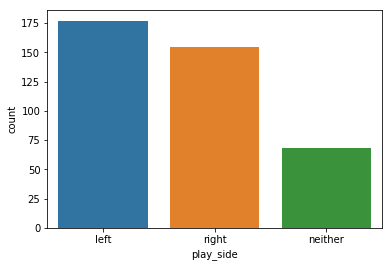

In [79]:
sns.countplot(cdf['play_side']);

In [ ]:
# Pass/ Run

In [60]:
dic = {}
for _ in ['left', 'right']:
    for play in ['run', 'pass', 'fake']:
        files = os.listdir(os.path.join(f'saved_plays/{_}', play))
        files = [f for f in files if f.endswith('.jpg')]

        for file in files:
            dic[file] = play

In [71]:
newdf3 = cdf[ cdf['play_side']!='neither' ].copy()
newdf3['play_type'] = newdf3['play_image'].apply(lambda x: dic[x.lstrip('saved_plays/')])

In [72]:
newdf3.head()

,video_file,date,cap_file,play_image,play_side,play_type
0,Madden NFL 19_20190518193824.mp4,2019-05-18,saved_frames/Madden NFL 19_2019051819382-frame...,saved_plays/Madden NFL 19_2019051819382-frame1...,left,run
1,Madden NFL 19_20190518194258.mp4,2019-05-18,saved_frames/Madden NFL 19_20190518194258-fram...,saved_plays/Madden NFL 19_20190518194258-frame...,left,run
2,Madden NFL 19_20190518193848.mp4,2019-05-18,saved_frames/Madden NFL 19_20190518193848-fram...,saved_plays/Madden NFL 19_20190518193848-frame...,left,run
3,Madden NFL 19_20190518193117.mp4,2019-05-18,saved_frames/Madden NFL 19_20190518193117-fram...,saved_plays/Madden NFL 19_20190518193117-frame...,right,pass
4,Madden NFL 19_20190518192339.mp4,2019-05-18,saved_frames/Madden NFL 19_20190518192339-fram...,saved_plays/Madden NFL 19_20190518192339-frame...,right,run


In [80]:
newdf3['play_type'].value_counts()

pass    223
run     101
fake      8
Name: play_type, dtype: int64

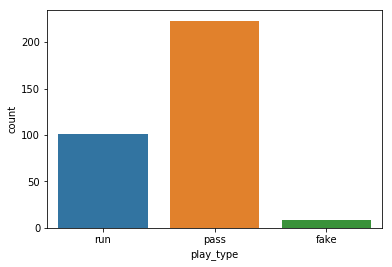

In [78]:
sns.countplot(newdf3['play_type']);

In [74]:
newdf3.to_csv(f'may19_with_type_{RUN_INDEX}.csv')